## Este notebook tem como objetivo apresentar os resultados obtidos no PIBIC

In [2]:
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')

import matplotlib as mpl
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from tqdm.notebook import tqdm

import numpy as np
import warnings
warnings.filterwarnings('ignore')

from optic.modulation import modulateGray, GrayMapping
from optic.metrics import signal_power, fastBERcalc
from optic.models import awgn
from optic.dsp import pnorm
from optic.plot import pconst
from optic.core import parameters

In [3]:
plt.rcParams['font.size'] = 10
plt.rcParams['lines.linewidth'] = 1.8
plt.rcParams['text.usetex'] = False

figurePath = r'C:\Users\Silas\Documents\PIVIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'

In [4]:
def loadArray(file_path):
    with open(file_path, 'rb') as stream:
        data = np.load(stream)
    return data

### Carrega os dados das simulações

In [5]:
# Dados para as métricas de CSPR
CSPR_BER_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_0'+str('_outlier.npy'))
CSPR_BER_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_1'+str('_outlier.npy'))
CSPR_BER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_2'+str('_outlier.npy'))
CSPR_BER_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_3'+str('_outlier.npy'))
CSPR_BER_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_BER_SpS_4_128_Sample_4'+str('_outlier.npy'))
CSPR_SER_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_0'+str('_outlier.npy'))
CSPR_SER_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_1'+str('_outlier.npy'))
CSPR_SER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_2'+str('_outlier.npy'))
CSPR_SER_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_3'+str('_outlier.npy'))
CSPR_SER_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SER_SpS_4_128_Sample_4'+str('_outlier.npy'))
CSPR_SNR_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_0'+str('_outlier.npy'))
CSPR_SNR_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_1'+str('_outlier.npy'))
CSPR_SNR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_2'+str('_outlier.npy'))
CSPR_SNR_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_3'+str('_outlier.npy'))
CSPR_SNR_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SNR_SpS_4_128_Sample_4'+str('_outlier.npy'))
CSPR_SIR_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_0'+str('_outlier.npy'))
CSPR_SIR_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_1'+str('_outlier.npy'))
CSPR_SIR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_2'+str('_outlier.npy'))
CSPR_SIR_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_3'+str('_outlier.npy'))
CSPR_SIR_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\CSPR_SIR_SpS_4_128_Sample_4'+str('_outlier.npy'))

# Dados para as métricas de roll-off
Rolloff_SNR_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_0.npy')
Rolloff_SNR_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_1.npy')
Rolloff_SNR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_2.npy')
Rolloff_SNR_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_3.npy')
Rolloff_SNR_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SNR_SpS_4_128_Sample_4.npy')
Rolloff_SIR_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_0.npy')
Rolloff_SIR_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_1.npy')
Rolloff_SIR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_2.npy')
Rolloff_SIR_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_3.npy')
Rolloff_SIR_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SIR_SpS_4_128_Sample_4.npy')
Rolloff_SER_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_0.npy')
Rolloff_SER_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_1.npy')
Rolloff_SER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_2.npy')
Rolloff_SER_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_3.npy')
Rolloff_SER_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_SER_SpS_4_128_Sample_4.npy')
Rolloff_BER_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_0.npy')
Rolloff_BER_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_1.npy')
Rolloff_BER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_2.npy')
Rolloff_BER_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_3.npy')
Rolloff_BER_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Rolloff_BER_SpS_4_128_Sample_4.npy')

# Dados para as métricas de FO
FO_BER_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_0.npy')
FO_BER_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_1.npy')
FO_BER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_2.npy')
FO_BER_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_3.npy')
FO_BER_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample_4.npy')
FO_SER_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_0.npy')
FO_SER_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_1.npy')
FO_SER_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_2.npy')
FO_SER_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_3.npy')
FO_SER_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample_4.npy')
FO_SNR_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_0.npy')
FO_SNR_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_1.npy')
FO_SNR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_2.npy')
FO_SNR_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_3.npy')
FO_SNR_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample_4.npy')
FO_SIR_0 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_0.npy')
FO_SIR_1 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_1.npy')
FO_SIR_2 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_2.npy')
FO_SIR_3 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_3.npy')
FO_SIR_4 = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample_4.npy')

CSPR_BER = np.mean([CSPR_BER_0, CSPR_BER_1, CSPR_BER_2, CSPR_BER_3, CSPR_BER_4], axis=0)
CSPR_SER = np.mean([CSPR_SER_0, CSPR_SER_1, CSPR_SER_2, CSPR_SER_3, CSPR_SER_4], axis=0)
CSPR_SIR = np.mean([CSPR_SIR_0, CSPR_SIR_1, CSPR_SIR_2, CSPR_SIR_3, CSPR_SIR_4], axis=0)
CSPR_SNR = np.mean([CSPR_SNR_0, CSPR_SNR_1, CSPR_SNR_2, CSPR_SNR_3, CSPR_SNR_4], axis=0)

Rolloff_SNR = np.mean([Rolloff_SNR_0, Rolloff_SNR_1, Rolloff_SNR_2, Rolloff_SNR_3, Rolloff_SNR_4], axis=0)
Rolloff_BER = np.mean([Rolloff_BER_0, Rolloff_BER_1, Rolloff_BER_2, Rolloff_BER_3, Rolloff_BER_4], axis=0)
Rolloff_SER = np.mean([Rolloff_SER_0, Rolloff_SER_1, Rolloff_SER_2, Rolloff_SER_3, Rolloff_SER_4], axis=0)
Rolloff_SIR = np.mean([Rolloff_SIR_0, Rolloff_SIR_1, Rolloff_SIR_2, Rolloff_SIR_3, Rolloff_SIR_4], axis=0)

FO_BER = np.mean([FO_BER_0, FO_BER_1, FO_BER_2, FO_BER_3, FO_BER_4], axis=0)
FO_SER = np.mean([FO_SER_0, FO_SER_1, FO_SER_2, FO_SER_3, FO_SER_4], axis=0)
FO_SIR = np.mean([FO_SIR_0, FO_SIR_1, FO_SIR_2, FO_SIR_3, FO_SIR_4], axis=0)
FO_SNR = np.mean([FO_SNR_0, FO_SNR_1, FO_SNR_2, FO_SNR_3, FO_SNR_4], axis=0)

In [52]:
SNR = CSPR_SNR[2,:] # Valores de SNR para rede convolucional
qamOrder = 64 # Ordem de modulação
loPower = np.arange(6,16,1)

BER = np.zeros((len(SNR), len(loPower)))

for ii, indCSPR in enumerate(loPower):
    print('run CSPR: ', indCSPR)
    for indSNR in tqdm(range(SNR.size)):
            
            snrdB = SNR[indSNR]
            # generate random bits
            bitsTx   = np.random.randint(2, size=int(np.log2(qamOrder)*1e5))   
            # Map bits to constellation symbols
            symbTx = modulateGray(bitsTx, qamOrder, 'qam')
            # Normalize symbols energy to 1
            symbTx = pnorm(symbTx)
            # AWGN channel       
            symbRx = awgn(symbTx, snrdB)
            # BER estimation
            BER[indSNR, ii], _, _ = fastBERcalc(symbRx, symbTx, qamOrder, 'qam')

run CSPR:  6


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  7


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  8


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  9


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  10


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  11


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  12


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  13


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  14


  0%|          | 0/10 [00:00<?, ?it/s]

run CSPR:  15


  0%|          | 0/10 [00:00<?, ?it/s]

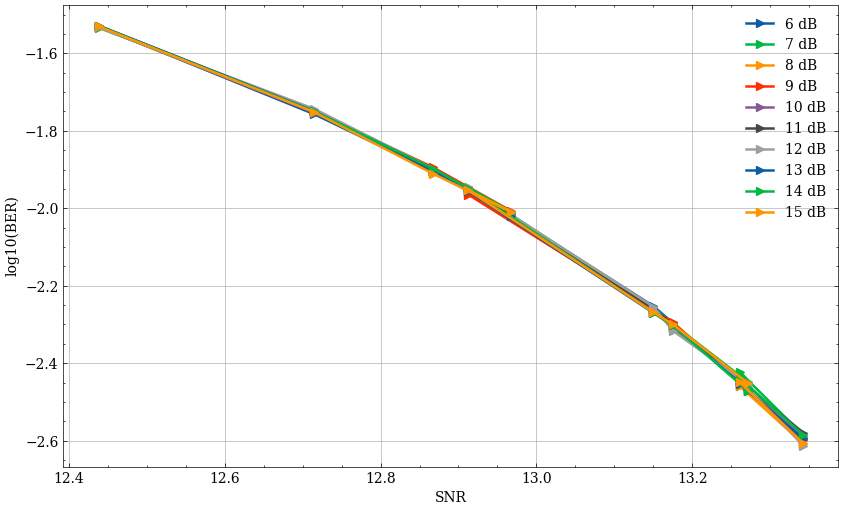

In [68]:
BER[BER==0] = np.nan

plt.figure(figsize=(10,6))
for ii, indCSPR in enumerate(loPower):
   plt.plot(10*np.log10(SNR), np.log10(BER[:,ii]), '->', label=str(indCSPR)+' dB')

plt.ylabel('log10(BER)');
plt.xlabel('SNR');
plt.legend();
plt.grid();

## CSPR variations results

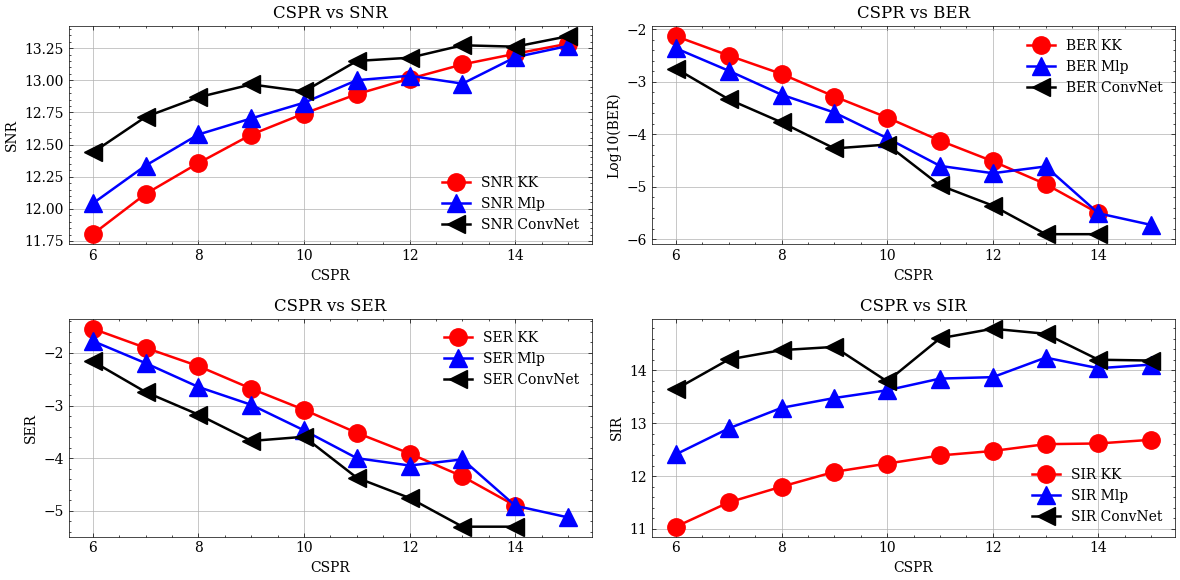

In [16]:
loPower = np.arange(6,16,1)
savePlots = True
markersize = 12.5
plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(loPower, 10*np.log10(CSPR_SNR[0,:]), color='red', marker='o', markersize=markersize, label='SNR KK')
plt.plot(loPower, 10*np.log10(CSPR_SNR[1,:]), color='blue', marker='^', markersize=markersize, label='SNR Mlp')
plt.plot(loPower, 10*np.log10(CSPR_SNR[2,:]), color='black', marker='<', markersize=markersize, label='SNR ConvNet')
plt.xlabel('CSPR')
plt.ylabel('SNR')
plt.title('CSPR vs SNR')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(loPower, np.log10(CSPR_BER[0,:]), color='red', marker='o', markersize=markersize, label='BER KK')
plt.plot(loPower, np.log10(CSPR_BER[1,:]), color='blue', marker='^', markersize=markersize, label='BER Mlp')
plt.plot(loPower, np.log10(CSPR_BER[2,:]), color='black', marker='<', markersize=markersize, label='BER ConvNet')
plt.xlabel('CSPR')
plt.ylabel('Log10(BER)')
plt.title('CSPR vs BER')
plt.legend()
plt.grid()

graphic03 = plt.subplot(2, 2, 3)
plt.plot(loPower, np.log10(CSPR_SER[0,:]), color='red', marker='o', markersize=markersize, label='SER KK')
plt.plot(loPower, np.log10(CSPR_SER[1,:]), color='blue', marker='^', markersize=markersize, label='SER Mlp')
plt.plot(loPower, np.log10(CSPR_SER[2,:]), color='black', marker='<', markersize=markersize, label='SER ConvNet')
plt.xlabel('CSPR')
plt.ylabel('SER')
plt.title('CSPR vs SER')
plt.legend()
plt.grid()

graphic04 = plt.subplot(2, 2, 4)
plt.plot(loPower, 10*np.log10(CSPR_SIR[0,:]), color='red', marker='o', markersize=markersize, label='SIR KK')
plt.plot(loPower, 10*np.log10(CSPR_SIR[1,:]), color='blue', marker='^', markersize=markersize, label='SIR Mlp')
plt.plot(loPower, 10*np.log10(CSPR_SIR[2,:]), color='black', marker='<', markersize=markersize, label='SIR ConvNet')
plt.xlabel('CSPR')
plt.ylabel('SIR')
plt.title('CSPR vs SIR')
plt.legend()
plt.grid()

plt.tight_layout()

if savePlots:
    plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\CSPR_Results.png', dpi=600)

## Roll-off variations results

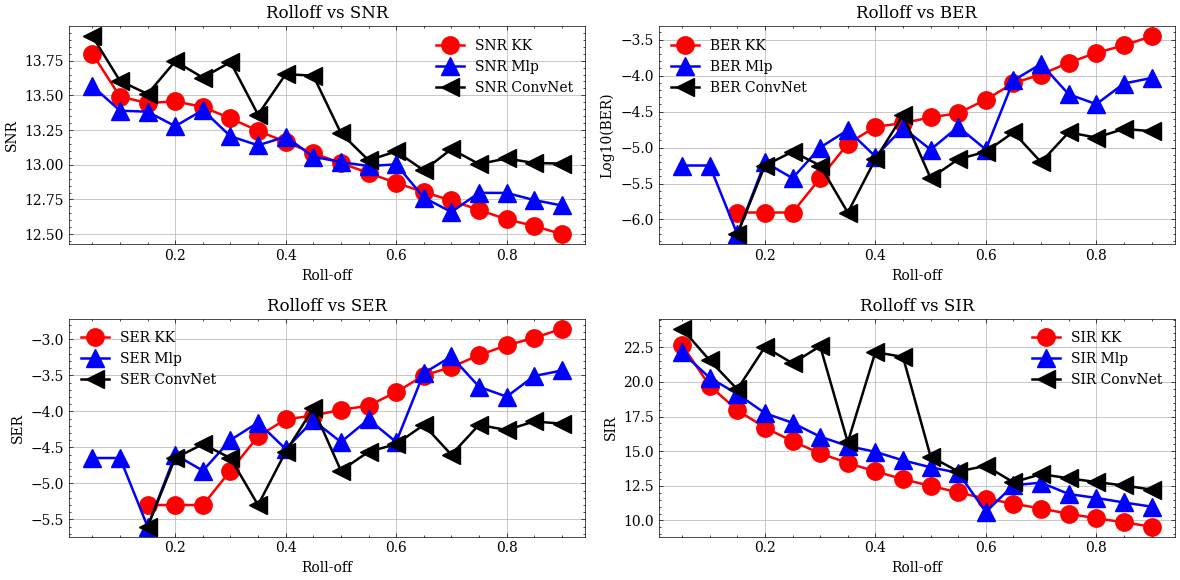

In [17]:
Rolloff = np.arange(0.05, 0.95, 0.05)
savePlots = True
markersize = 12.5

plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(Rolloff, 10*np.log10(Rolloff_SNR[0,:]), color = 'red', marker='o', markersize=markersize, label='SNR KK')
plt.plot(Rolloff, 10*np.log10(Rolloff_SNR[1,:]), color = 'blue', marker='^', markersize=markersize, label='SNR Mlp')
plt.plot(Rolloff, 10*np.log10(Rolloff_SNR[2,:]), color = 'black', marker='<', markersize=markersize, label='SNR ConvNet')
plt.xlabel('Roll-off')
plt.ylabel('SNR')
plt.title('Rolloff vs SNR')
plt.legend()
plt.grid()

graphic02 = plt.subplot(2, 2, 2)
plt.plot(Rolloff, np.log10(Rolloff_BER[0,:]), color = 'red', marker='o', markersize=markersize, label='BER KK')
plt.plot(Rolloff, np.log10(Rolloff_BER[1,:]), color = 'blue', marker='^', markersize=markersize, label='BER Mlp')
plt.plot(Rolloff, np.log10(Rolloff_BER[2,:]), color = 'black', marker='<', markersize=markersize, label='BER ConvNet')
plt.xlabel('Roll-off')
plt.ylabel('Log10(BER)')
plt.title('Rolloff vs BER')
plt.legend()
plt.grid()

graphic03 = plt.subplot(2, 2, 3)
plt.plot(Rolloff, np.log10(Rolloff_SER[0,:]), color = 'red', marker='o', markersize=markersize, label='SER KK')
plt.plot(Rolloff, np.log10(Rolloff_SER[1,:]), color = 'blue', marker='^', markersize=markersize, label='SER Mlp')
plt.plot(Rolloff, np.log10(Rolloff_SER[2,:]), color = 'black', marker='<', markersize=markersize, label='SER ConvNet')
plt.xlabel('Roll-off')
plt.ylabel('SER')
plt.title('Rolloff vs SER')
plt.legend()
plt.grid()

graphic04 = plt.subplot(2, 2, 4)
plt.plot(Rolloff, 10*np.log10(Rolloff_SIR[0,:]), color = 'red', marker='o', markersize=markersize, label='SIR KK')
plt.plot(Rolloff, 10*np.log10(Rolloff_SIR[1,:]), color = 'blue', marker='^', markersize=markersize, label='SIR Mlp')
plt.plot(Rolloff, 10*np.log10(Rolloff_SIR[2,:]), color = 'black', marker='<', markersize=markersize, label='SIR ConvNet')
plt.xlabel('Roll-off')
plt.ylabel('SIR')
plt.title('Rolloff vs SIR')
plt.legend()
plt.grid()

plt.tight_layout()

if savePlots:
    plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\Rolloff_Results.png', dpi=600)

## FO variations results

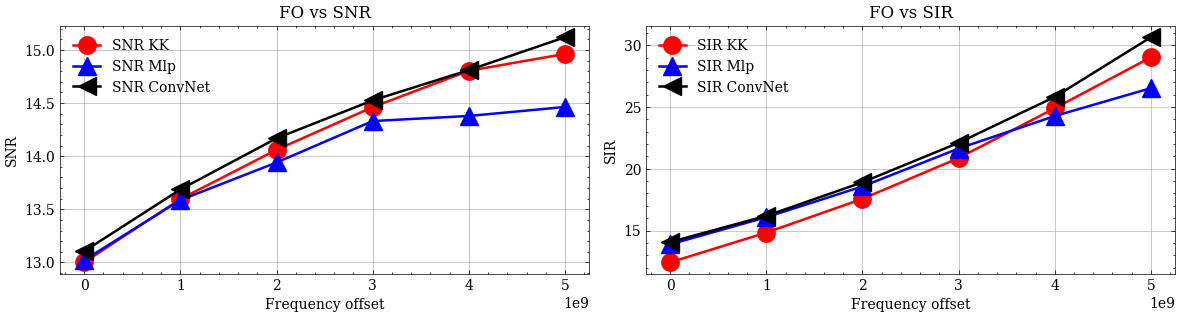

In [18]:
FO_Values = np.arange(0e9, 6e9, 1e9)
savePlots = True
markersize = 12.5

FO_BER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_BER_SpS_4_128_Sample.npy')
FO_SIR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SIR_SpS_4_128_Sample.npy')
FO_SNR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SNR_SpS_4_128_Sample.npy')
FO_SER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\FO_SER_SpS_4_128_Sample.npy')

Conv_FO_SER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SER_SpS_4_128_Sample.npy')
Conv_FO_SIR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SIR_SpS_4_128_Sample.npy')
Conv_FO_BER = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_BER_SpS_4_128_Sample.npy')
Conv_FO_SNR = loadArray(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Data\Pibic\Conv_FO_SNR_SpS_4_128_Sample.npy')


plt.figure(num=None, figsize=(12, 6))

graphic01 = plt.subplot(2, 2, 1)
plt.plot(FO_Values, 10*np.log10(FO_SNR[0,:]), color = 'red', marker='o', markersize=markersize, label='SNR KK')
plt.plot(FO_Values, 10*np.log10(FO_SNR[1,:]), color = 'blue', marker='^', markersize=markersize, label='SNR Mlp')
plt.plot(FO_Values, 10*np.log10(FO_SNR[2,:]), color = 'black', marker='<', markersize=markersize, label='SNR ConvNet')
plt.xlabel('Frequency offset')
plt.ylabel('SNR')
plt.title('FO vs SNR')
plt.legend()
plt.grid()

# graphic02 = plt.subplot(2, 2, 2)
# plt.plot(FO_Values, np.log10(FO_BER[0,:]), marker='o', markersize=8.5, label='BER KK')
# plt.plot(FO_Values, np.log10(FO_BER[1,:]), marker='^', markersize=8.5, label='BER Mlp')
# plt.plot(FO_Values, np.log10(Conv_FO_BER[2,:]), marker='<', markersize=8.5, label='BER ConvNet')
# plt.xlabel('Frequency offset')
# plt.ylabel('Log10(BER)')
# plt.title('FO vs BER')
# plt.legend()
# plt.grid()

# graphic03 = plt.subplot(2, 2, 3)
# plt.plot(FO_Values, np.log10(FO_SER[0,:]), marker='o', markersize=8.5, label='SER KK')
# plt.plot(FO_Values, np.log10(FO_SER[1,:]), marker='^', markersize=8.5, label='SER Mlp')
# plt.plot(FO_Values, np.log10(Conv_FO_SER[2,:]), marker='<', markersize=8.5, label='SER ConvNet')
# plt.xlabel('Frequency offset')
# plt.ylabel('SER')
# plt.title('FO vs SER')
# plt.legend()
# plt.grid()

graphic04 = plt.subplot(2, 2, 2)
plt.plot(FO_Values, 10*np.log10(FO_SIR[0,:]), color = 'red', marker='o', markersize=markersize, label='SIR KK')
plt.plot(FO_Values, 10*np.log10(FO_SIR[1,:]), color = 'blue', marker='^', markersize=markersize, label='SIR Mlp')
plt.plot(FO_Values, 10*np.log10(FO_SIR[2,:]), color = 'black', marker='<', markersize=markersize, label='SIR ConvNet')
plt.xlabel('Frequency offset')
plt.ylabel('SIR')
plt.title('FO vs SIR')
plt.legend()
plt.grid()

plt.tight_layout()

if savePlots:
    plt.savefig(r'C:\Users\optic\Documents\PIVIC-PIBIC-Comunicacoes-Opticas\resultados\Figuras\Pibic'+'\FO_Results.png', dpi=600)